What is this data?( [check this](https://cfpb.github.io/api/ccdb/fields.html) ).

The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to
companies for response. Complaints are published after the company responds, confirming a commercial relationship with the
consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository 
institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally
updates daily.

# 1.Importing Libraries

In [1]:
# for Linear Algebra operations
import numpy as np

# for Data Preprocesssing
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from wordcloud import WordCloud

# 2.Getting the train and test datasets

In [3]:
cd_train = pd.read_csv("Consumer_Complaints_train.csv").set_index("Complaint ID")
cd_test = pd.read_csv("Consumer_Complaints_test_share.csv").set_index("Complaint ID")

In [2]:
cdt_train = pd.read_csv("Consumer_Complaints_train.csv")
cdt_test = pd.read_csv("Consumer_Complaints_test_share.csv")

In [4]:
cdt_train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [7]:
cdt_train['Consumer complaint narrative'].nunique()

74019

In [8]:
cdt_train['Product'].nunique()

12

In [9]:
cdt_train['Product'].value_counts()

Mortgage                   156175
Debt collection             86544
Credit reporting            81115
Credit card                 57358
Bank account or service     54403
Consumer Loan               18599
Student loan                14918
Money transfers              3349
Payday loan                  3219
Prepaid card                 2226
Other financial service       507
Virtual currency                8
Name: Product, dtype: int64

# 3.Data Exploration/Analysis

In [3]:
cd_train.shape , cd_test.shape

((478421, 17), (119606, 16))

In [4]:
cd_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [5]:
cd_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,,,
856103,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No
1034666,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No
756363,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No
1474177,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No
1132572,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No


In [6]:
cd_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478421 entries, 856103 to 1093195
Data columns (total 17 columns):
Date received                   478421 non-null object
Product                         478421 non-null object
Sub-product                     339948 non-null object
Issue                           478421 non-null object
Sub-issue                       185796 non-null object
Consumer complaint narrative    75094 non-null object
Company public response         90392 non-null object
Company                         478421 non-null object
State                           474582 non-null object
ZIP code                        474573 non-null object
Tags                            67206 non-null object
Consumer consent provided?      135487 non-null object
Submitted via                   478421 non-null object
Date sent to company            478421 non-null object
Company response to consumer    478421 non-null object
Timely response?                478421 non-null object
Consum

# Response Variable

We're going to try to predict the Consumer disputed resolution variable. What are the value counts for this variable?

In [7]:
cd_train['Consumer disputed?'].value_counts(dropna=False)

No     376990
Yes    101431
Name: Consumer disputed?, dtype: int64

In [8]:
# Status counts as percentages:

cd_train['Consumer disputed?'].value_counts(normalize=True, dropna=False)

No     0.787988
Yes    0.212012
Name: Consumer disputed?, dtype: float64

About 78.79% of the consumer disputed have no dispute and 21.20% have dispute, so we have a somewhat unbalanced classification problem.

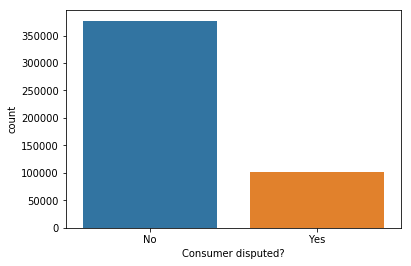

In [9]:
sns.countplot(x="Consumer disputed?", data=cd_train)

In [10]:
cd_train["Consumer disputed?"] = np.where(cd_train["Consumer disputed?"] == "Yes" , 1 , 0)

In [11]:
cd_train["Consumer disputed?"].value_counts()

0    376990
1    101431
Name: Consumer disputed?, dtype: int64

# missing values :
Let’s take a more detailed look at what data is actually missing:

In [12]:
#cd_train.isnull().sum()

In [13]:
total_mv = cd_train.isnull().sum().sort_values(ascending=False)
percent_1 = cd_train.isnull().sum()/cd_train.isnull().count()*100
percent_2 = round(percent_1 , 2).sort_values(ascending=True)
missing_values = pd.concat([total_mv , percent_2] , axis=1 , keys=['Total' , '%'])
missing_values

C:\Users\srinivas chary\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
Company,0,0.00
Company public response,388029,81.11
Company response to consumer,0,0.00
Consumer complaint narrative,403327,84.30
Consumer consent provided?,342934,71.68
Consumer disputed?,0,0.00
Date received,0,0.00
Date sent to company,0,0.00
Issue,0,0.00
Product,0,0.00


We see a large number of NaN values in many columns. Before we proceed further and process these NaN values let's have a look at how these variables are related.

**Sub-product**: Every product doesn't have a subproduct for ex. vehicle loan . So naturally we will have some NaN values in sub-product.  
**Issue**: Issue depends on both product and sub-product. Different products and sub-products have different issues.  
**Sub-Issue**:  Sub-issue depends on product, sub-product and issue. Hence, it is likely  that it will have more NaN values.  
**Customer complaint**: We have large number of nan values in this column. The best possible explaination of this is that customer has not given or retracted his consent on making complaint public( CFCB provides this option).  
**Company  response**: This is an optional column like customer complaint.  



# 4.Pre-processing and Exploratory Analysis

We'll inspect each feature individually, and do the following:

Drop the feature if it is not useful for predicting the Consumer disputed.

View summary statistics and visualize the data, plotting against the Consumer disputed.

Modify the feature to make it useful for modeling, if necessary.

In [14]:
print(list(cd_train.columns))

['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']


In [15]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Date received : 1759
Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Consumer complaint narrative : 74019
Company public response : 10
Company : 3276
State : 62
ZIP code : 25962
Tags : 3
Consumer consent provided? : 4
Submitted via : 6
Date sent to company : 1706
Company response to consumer : 7
Timely response? : 2


# 4.1 Date received

In [16]:
cd_train["Date received"].isnull().sum()

0

In [17]:
cd_train['Date received'].nunique()

1759

Let's create a few variables from the date variable for analysis. Does the number of complaints increases every year? Is there a particular month when consumers are more likely to file a complaint?

In [18]:
import dateparser
# for train dataset
cd_train['received year'] = cd_train['Date received'].map(lambda x: x.split("-")[-3] if "-" in x else x.split("/")[-3])
cd_train['received month'] = cd_train['Date received'].map(lambda x: x.split("-")[1] if "-" in x else x.split("/")[1])

# for test dataset
cd_test['received year'] = cd_test['Date received'].map(lambda x: x.split("-")[-3] if "-" in x else x.split("/")[-3])
cd_test['received month'] = cd_test['Date received'].map(lambda x: x.split("-")[1] if "-" in x else x.split("/")[1])

In [19]:
cd_train['received year'].head()

Complaint ID
856103     2014
1034666    2014
756363     2014
1474177    2015
1132572    2014
Name: received year, dtype: object

In [20]:
cd_train['received year'].unique()

array(['2014', '2015', '2012', '2013', '2016', '2011'], dtype=object)

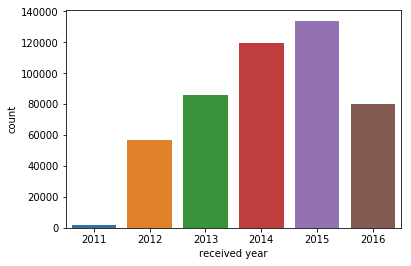

In [21]:
# Distribution of complaints by year

sns.countplot(x='received year', data = cd_train)

There is steady increase in number of complaints over the years. This can be attributed to two likely reasons:
1. More and more consumers are getting aware of CFCB platform and using it to resolve their complaints.
2. The number of consumers availing these products has increased.

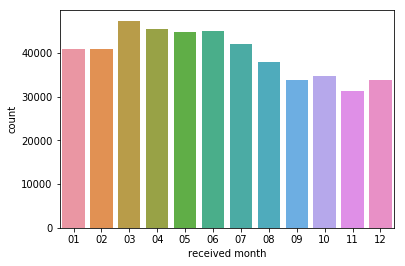

In [22]:
# Distribution of complaints by month

sns.countplot(x="received month", data=cd_train)

Number of complaints in each month does not differ much.

In [23]:
#cd_train['received month'].value_counts()

In [24]:
# converting the object variable to numeric

cd_train['received year'] = pd.to_numeric(cd_train['received year'])
cd_train['received month'] = pd.to_numeric(cd_train['received month'])

cd_test['received year'] = pd.to_numeric(cd_test['received year'])
cd_test['received month'] = pd.to_numeric(cd_test['received month'])

In [25]:
#cd_train.info()

# 4.2 Product

In [26]:
cd_train['Product'].isnull().sum()

0

In [27]:
cd_train['Product'].nunique()

12

In [28]:
cd_train['Product'].value_counts()

Mortgage                   156175
Debt collection             86544
Credit reporting            81115
Credit card                 57358
Bank account or service     54403
Consumer Loan               18599
Student loan                14918
Money transfers              3349
Payday loan                  3219
Prepaid card                 2226
Other financial service       507
Virtual currency                8
Name: Product, dtype: int64

Text(0, 0.5, 'Count')

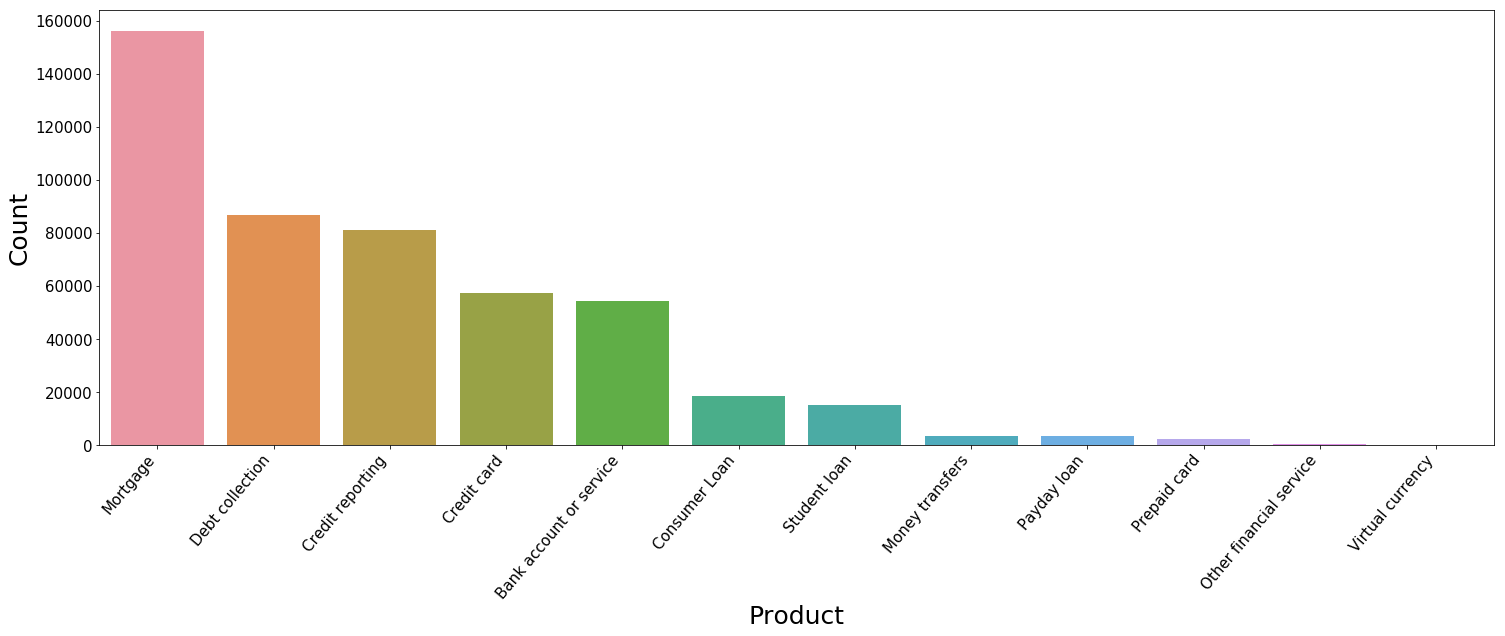

In [29]:
# Distribution of Complaints by Product

plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Product', data = cd_train,  order = cd_train["Product"].value_counts().index)
g.set_xlabel("Product", fontsize=25)
g.set_ylabel("Count", fontsize=25)

In [30]:
cd_train['Product'].value_counts(normalize=True, dropna=False)

Mortgage                   0.326438
Debt collection            0.180895
Credit reporting           0.169547
Credit card                0.119890
Bank account or service    0.113714
Consumer Loan              0.038876
Student loan               0.031182
Money transfers            0.007000
Payday loan                0.006728
Prepaid card               0.004653
Other financial service    0.001060
Virtual currency           0.000017
Name: Product, dtype: float64

The CFCB has updated its application form and rearranged and merged some of the products and sub-products. We need to replace the old values with the new ones before starting analysis to make sure it's consistent. [This doc](https://files.consumerfinance.gov/f/documents/201704_cfpb_Summary_of_Product_and_Sub-product_Changes.pdf) explains the mapping from old to new.

In [31]:
cd_train['Product'] = cd_train['Product'].replace(to_replace =["Credit card" , "Prepaid card"],
                                                  value ="Credit card and Prepaid card")

cd_train['Product'] = cd_train['Product'].replace(to_replace =["Money transfers","Virtual currency","Other financial service"],
                                                  value ="money transfer,virtual currency and others") 


cd_test['Product'] = cd_test['Product'].replace(to_replace =["Credit card" , "Prepaid card"],
                                                  value ="Credit card and Prepaid card")

cd_test['Product'] = cd_test['Product'].replace(to_replace =["Money transfers","Virtual currency","Other financial service"],
                                                  value ="money transfer,virtual currency and others") 

Text(0, 0.5, 'Count')

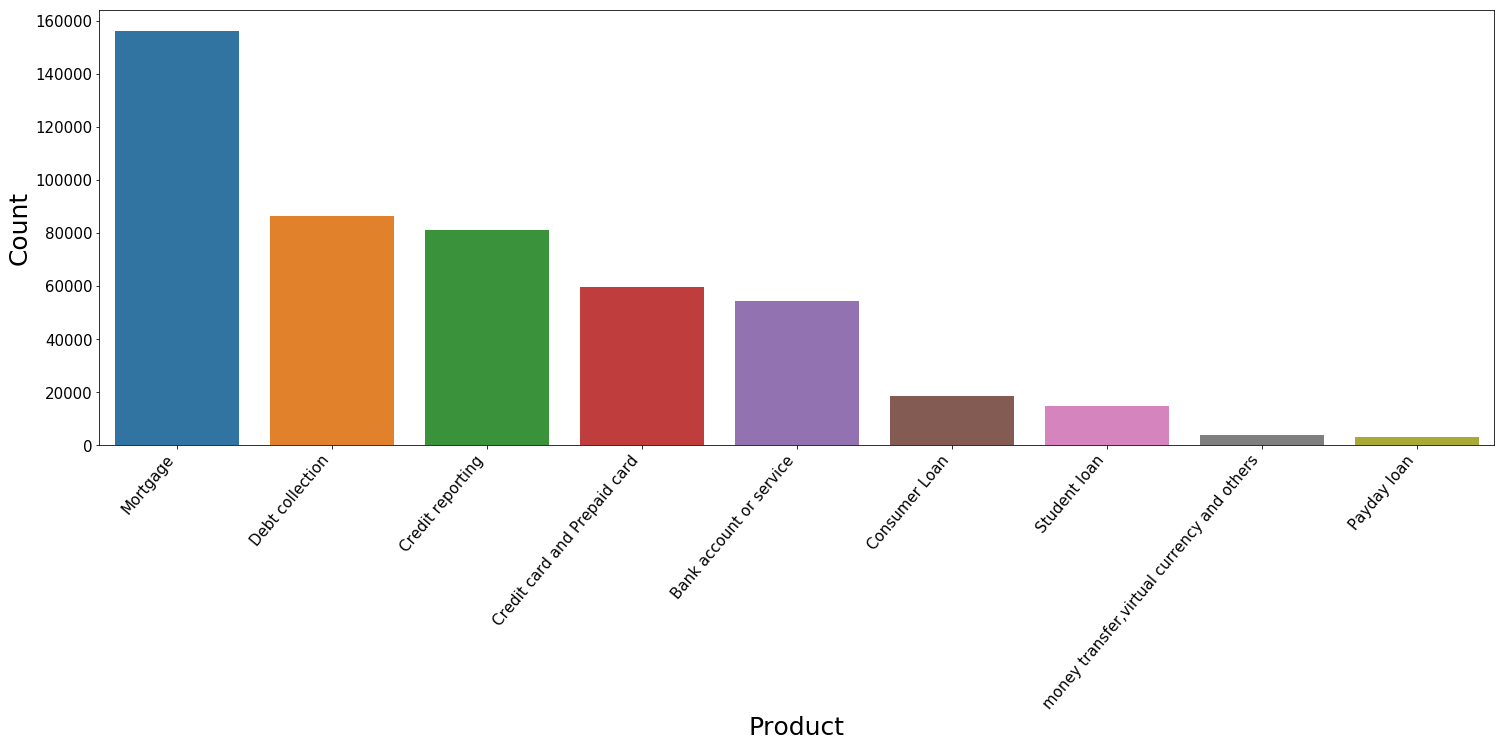

In [32]:
# Distribution of Complaints by Product

plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Product', data = cd_train,  order = cd_train["Product"].value_counts().index)
g.set_xlabel("Product", fontsize=25)
g.set_ylabel("Count", fontsize=25)

# 4.3 Sub-product

In [33]:
cd_train['Sub-product'].isnull().sum()

138473

In [34]:
(cd_train['Sub-product'].isnull().sum() / len(cd_train['Sub-product']))*100

28.943754559268932

In [35]:
cd_train['Sub-product'].nunique()

47

In [36]:
cd_train['Sub-product'].value_counts()

Other mortgage                            61522
Conventional fixed mortgage               48028
Checking account                          38310
Other (i.e. phone, health club, etc.)     25691
I do not know                             18169
Credit card                               17981
Conventional adjustable mortgage (ARM)    17566
FHA mortgage                              16316
Non-federal student loan                  15287
Medical                                   11514
Vehicle loan                              10714
Other bank product/service                 9896
Payday loan                                7837
Home equity loan or line of credit         7605
Installment loan                           4788
Savings account                            3419
VA mortgage                                3285
Mortgage                                   3033
(CD) Certificate of deposit                2373
Auto                                       2167
International money transfer            

In [37]:
cd_train['Sub-product'].value_counts(normalize=True, dropna=False).head()

NaN                                      0.289438
Other mortgage                           0.128594
Conventional fixed mortgage              0.100389
Checking account                         0.080076
Other (i.e. phone, health club, etc.)    0.053700
Name: Sub-product, dtype: float64

Text(0, 0.5, 'Count')

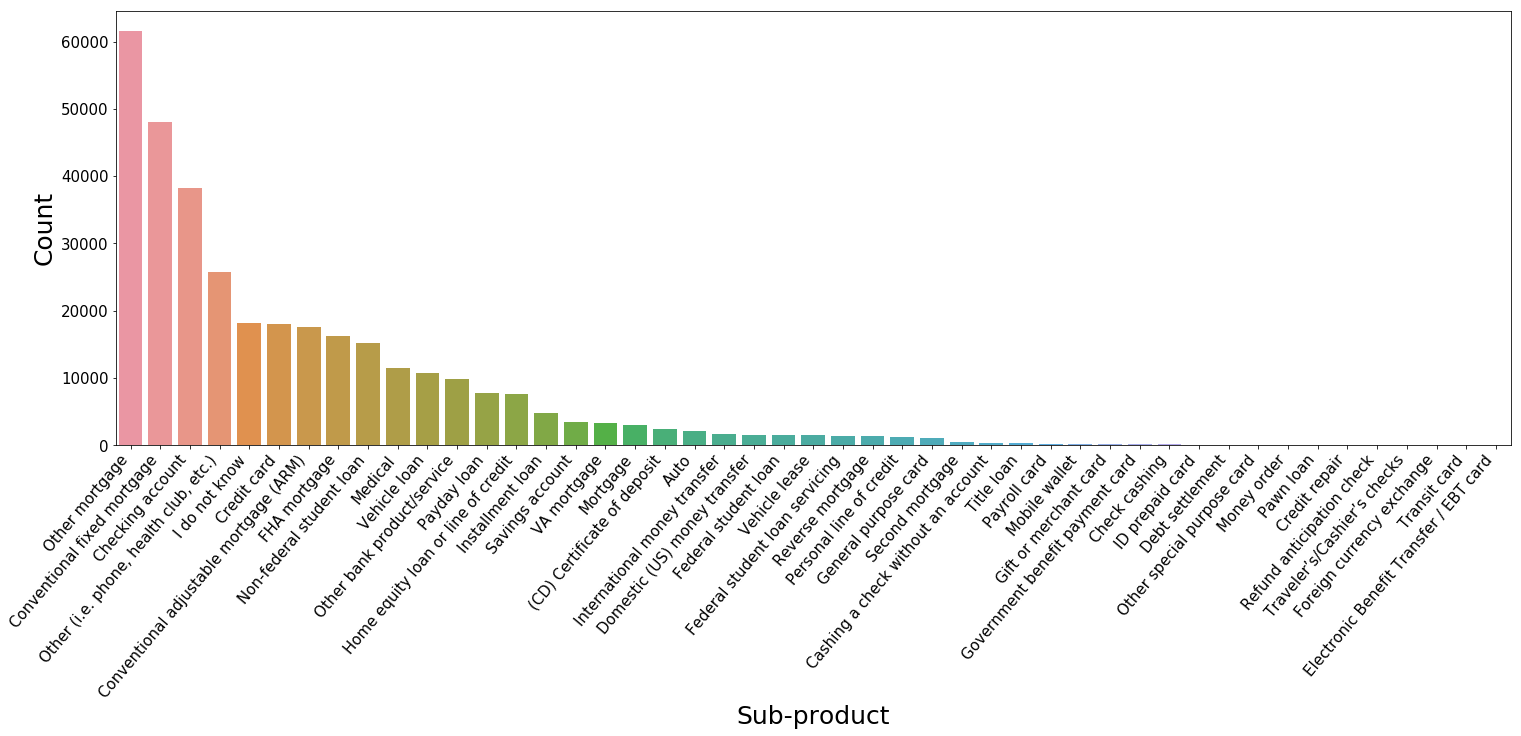

In [38]:
# Distribution of Complaints by Product

plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Sub-product', data = cd_train,  order = cd_train["Sub-product"].value_counts().index)
g.set_xlabel("Sub-product", fontsize=25)
g.set_ylabel("Count", fontsize=25)

# 4.4 Issue

In [39]:
cd_train['Issue'].isnull().sum()

0

In [40]:
cd_train['Issue'].nunique()

95

In [41]:
cd_train['Issue'].value_counts().head()

Loan modification,collection,foreclosure    80302
Incorrect information on credit report      58527
Loan servicing, payments, escrow account    51403
Cont'd attempts collect debt not owed       36367
Account opening, closing, or management     23568
Name: Issue, dtype: int64

In [42]:
# cd_train['Issue'].value_counts(normalize=True, dropna=False).head()

Text(0, 0.5, 'Count')

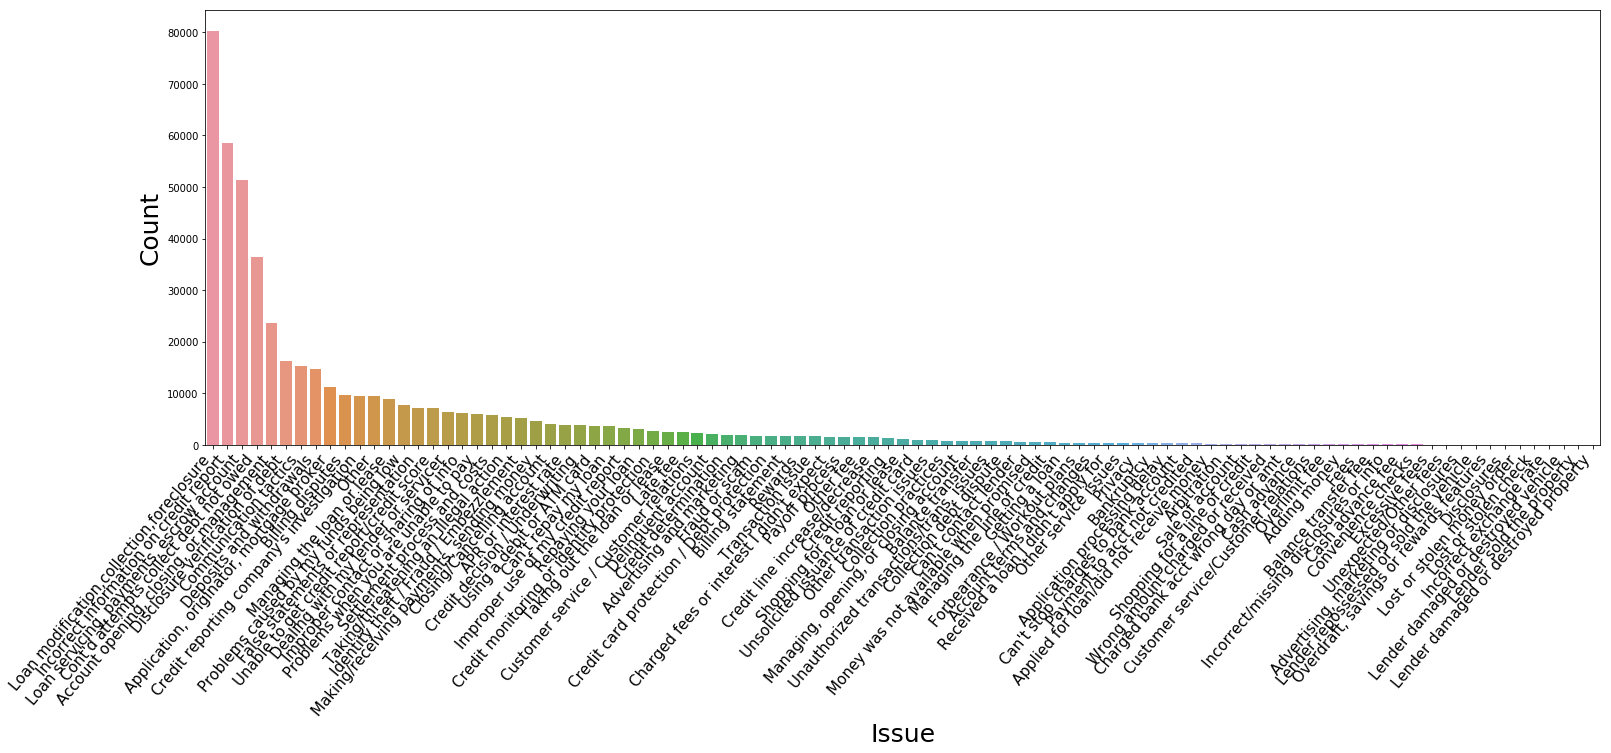

In [43]:
# Distribution of Complaints by Product

plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=10)
g = sns.countplot(x='Issue', data = cd_train,  order = cd_train["Issue"].value_counts().index)
g.set_xlabel("Issue", fontsize=25)
g.set_ylabel("Count", fontsize=25)

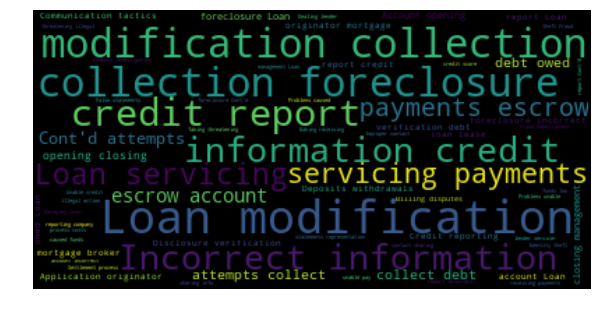

In [44]:
# most frequently used words using word cloud

from wordcloud import WordCloud

all_articles = ' '.join(cd_train['Issue'])
wordcloud_spam = WordCloud().generate(all_articles)
plt.figure(figsize = (10,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text analysis of feature ISSUE :

In [45]:
# counting the number of Stopwords,letters and words used by each author in each issue :

from nltk.corpus import stopwords
stop = stopwords.words('english')

cd_issue = cd_train.copy()

cd_issue['stopwords'] = cd_issue['Issue'].apply(lambda x: len([x for x in x.split() if x in stop]))
cd_issue['Letter_Count'] = cd_issue['Issue'].apply(lambda s : len(s))
cd_issue['Word_Count'] = cd_issue['Issue'].apply(lambda s : len(s.split(' ')))
cd_issue[['Issue','stopwords','Letter_Count','Word_Count']].head()

,Issue,stopwords,Letter_Count,Word_Count
Complaint ID,,,,
856103,Billing statement,0,17,2
1034666,"Making/receiving payments, sending money",0,40,4
756363,Incorrect information on credit report,1,38,5
1474177,Billing statement,0,17,2
1132572,Transaction issue,0,17,2


In [46]:
#  Removal of Stop Words in train dataset :

cd_train['Issue'] = cd_train['Issue'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
cd_train['Issue'].head()

Complaint ID
856103                            Billing statement
1034666    Making/receiving payments, sending money
756363          Incorrect information credit report
1474177                           Billing statement
1132572                           Transaction issue
Name: Issue, dtype: object

In [47]:
#  Removing Punctuation in train data :

cd_train['Issue'] = cd_train['Issue'].str.replace('[^\w\s]','')
cd_train['Issue'].head()

Complaint ID
856103                          Billing statement
1034666    Makingreceiving payments sending money
756363        Incorrect information credit report
1474177                         Billing statement
1132572                         Transaction issue
Name: Issue, dtype: object

In [48]:
# counting the number of Stopwords,letters and words used by each author in each issue :

from nltk.corpus import stopwords
stop = stopwords.words('english')

cd_issue = cd_test.copy()

cd_issue['stopwords'] = cd_issue['Issue'].apply(lambda x: len([x for x in x.split() if x in stop]))
cd_issue['Letter_Count'] = cd_issue['Issue'].apply(lambda s : len(s))
cd_issue['Word_Count'] = cd_issue['Issue'].apply(lambda s : len(s.split(' ')))
cd_issue[['Issue','stopwords','Letter_Count','Word_Count']].head()

,Issue,stopwords,Letter_Count,Word_Count
Complaint ID,,,,
675956,Deposits and withdrawals,1,24,3
1858795,Cont'd attempts collect debt not owed,1,37,6
32637,"Loan servicing, payments, escrow account",0,40,5
1731374,Unable to get credit report/credit score,1,40,6
501487,"Loan modification,collection,foreclosure",0,40,2


In [49]:
#  Removal of Stop Words in test dataset :

cd_test['Issue'] = cd_test['Issue'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
cd_test['Issue'].head()

Complaint ID
675956                         Deposits withdrawals
1858795           Cont'd attempts collect debt owed
32637      Loan servicing, payments, escrow account
1731374       Unable get credit report/credit score
501487     Loan modification,collection,foreclosure
Name: Issue, dtype: object

In [50]:
#  Removing Punctuation in test data :

cd_test['Issue'] = cd_test['Issue'].str.replace('[^\w\s]','')
cd_test['Issue'].head()

Complaint ID
675956                       Deposits withdrawals
1858795          Contd attempts collect debt owed
32637      Loan servicing payments escrow account
1731374      Unable get credit reportcredit score
501487     Loan modificationcollectionforeclosure
Name: Issue, dtype: object

In [51]:
cd_issue.shape

(119606, 21)

# Sub-issue

In [52]:
cd_train['Sub-issue'].isnull().sum()

292625

In [53]:
cd_train['Sub-issue'].value_counts(normalize=True, dropna=False).head()

NaN                                     0.611647
Account status                          0.047847
Debt is not mine                        0.046681
Information is not mine                 0.036840
Not given enough info to verify debt    0.023251
Name: Sub-issue, dtype: float64

In [54]:
cd_train['Sub-issue'].isnull().sum()/cd_train['Sub-issue'].shape

array([0.61164748])

In [55]:
cd_train['Sub-issue'].nunique()

68

# 4.5 Consumer complaint narrative

In [56]:
cd_train['Consumer complaint narrative'].isnull().sum()

403327

In [57]:
len(cd_train['Consumer complaint narrative']) - cd_train['Consumer complaint narrative'].isnull().sum()

75094

In [58]:
cd_train['Consumer complaint narrative'].nunique()

74019

In [59]:
cd_train.iloc[3]['Consumer complaint narrative']

"My credit card statement from US Bank, XXXX. XXXX XXXX, XXXX XXXX, MO XXXX, showed a balance due of {$770.00}. I transposed, in error, the cents and remitted {$770.00}, a difference of XXXX cents. For this slight error they billed me for {$8.00} in interest. That 's XXXX times the shortfall and it seems ludicrous to me. I called their customer service phone number as I did n't realized that I had transposed the cents and they explained the {$8.00} interest charge was a result of of XXXX cent error, and made no effort to resolve what I thought was an extraordinary interest charge. \n"

In [60]:
# cd_train['Consumer complaint narrative'].value_counts().head(3)

# Text analysis of the feature Consumer complaint narrative :

In [61]:
 # counting the number of Stopwords,letters and words used by each consumer in each complaint (train data) :

from nltk.corpus import stopwords
stop = stopwords.words('english')

cd_train['Consumer complaint narrative'] = cd_train['Consumer complaint narrative'].replace(to_replace = np.nan,
                                                                                            value ="no_narrative")

cd_ccn = cd_train.copy()

cd_ccn['stopwords'] = cd_ccn['Consumer complaint narrative'].apply(lambda x: len([x for x in x.split() if x in stop]))

cd_ccn['Letter_Count'] = cd_ccn['Consumer complaint narrative'].apply(lambda s : len(s))

cd_ccn['Word_Count'] = cd_ccn['Consumer complaint narrative'].apply(lambda s : len(s.split(' ')))

cd_ccn[['Consumer complaint narrative','stopwords','Letter_Count','Word_Count']].head()

,Consumer complaint narrative,stopwords,Letter_Count,Word_Count
Complaint ID,,,,
856103,no_narrative,0,12,1
1034666,no_narrative,0,12,1
756363,no_narrative,0,12,1
1474177,"My credit card statement from US Bank, XXXX. X...",36,588,105
1132572,no_narrative,0,12,1


In [62]:
#  Removing Punctuation in train data :

cd_train['Consumer complaint narrative'] = cd_train['Consumer complaint narrative'].str.replace('[^\w\s]','')
cd_train['Consumer complaint narrative'].head()

Complaint ID
856103                                          no_narrative
1034666                                         no_narrative
756363                                          no_narrative
1474177    My credit card statement from US Bank XXXX XXX...
1132572                                         no_narrative
Name: Consumer complaint narrative, dtype: object

In [63]:
#  Removal of Stop Words in train dataset :

cd_train['Consumer complaint narrative'] = cd_train['Consumer complaint narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
cd_train['Consumer complaint narrative'].head()

Complaint ID
856103                                          no_narrative
1034666                                         no_narrative
756363                                          no_narrative
1474177    My credit card statement US Bank XXXX XXXX XXX...
1132572                                         no_narrative
Name: Consumer complaint narrative, dtype: object

In [64]:
 # counting the number of Stopwords,letters and words used by each consumer in each complaint (test data) :

from nltk.corpus import stopwords
stop = stopwords.words('english')

cd_test['Consumer complaint narrative'] = cd_test['Consumer complaint narrative'].replace(to_replace = np.nan,
                                                                                          value ="no_narrative")

cd_ccn = cd_test.copy()

cd_ccn['stopwords'] = cd_ccn['Consumer complaint narrative'].apply(lambda x: len([x for x in x.split() if x in stop]))

cd_ccn['Letter_Count'] = cd_ccn['Consumer complaint narrative'].apply(lambda s : len(s))

cd_ccn['Word_Count'] = cd_ccn['Consumer complaint narrative'].apply(lambda s : len(s.split(' ')))

cd_ccn[['Consumer complaint narrative','stopwords','Letter_Count','Word_Count']].head(20)

,Consumer complaint narrative,stopwords,Letter_Count,Word_Count
Complaint ID,,,,
675956,no_narrative,0,12,1
1858795,no_narrative,0,12,1
32637,no_narrative,0,12,1
1731374,no_narrative,0,12,1
501487,no_narrative,0,12,1
631565,no_narrative,0,12,1
1283963,no_narrative,0,12,1
1902970,no_narrative,0,12,1
1160691,no_narrative,0,12,1


In [65]:
#  Removing Punctuation in train data :

cd_test['Consumer complaint narrative'] = cd_test['Consumer complaint narrative'].str.replace('[^\w\s]','')
cd_test['Consumer complaint narrative'].head()

Complaint ID
675956     no_narrative
1858795    no_narrative
32637      no_narrative
1731374    no_narrative
501487     no_narrative
Name: Consumer complaint narrative, dtype: object

In [66]:
#  Removal of Stop Words in test dataset :

cd_test['Consumer complaint narrative'] = cd_test['Consumer complaint narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
cd_test['Consumer complaint narrative'].head()

Complaint ID
675956     no_narrative
1858795    no_narrative
32637      no_narrative
1731374    no_narrative
501487     no_narrative
Name: Consumer complaint narrative, dtype: object

# 4.6 Company public response

In [67]:
cd_train['Company public response'].isnull().sum()

388029

In [68]:
cd_train['Company public response'].nunique()

10

In [69]:
cd_train['Company public response'].value_counts()

Company chooses not to provide a public response                                                                           41915
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            25672
Company believes it acted appropriately as authorized by contract or law                                                   16040
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1460
Company believes the complaint is the result of a misunderstanding                                                          1418
Company disputes the facts presented in the complaint                                                                       1395
Company believes complaint is the result of an isolated error                                                               1062
Company can't verify or dispute the facts in the complaint                                       

In [70]:
#cd_train['Company public response'].value_counts(normalize=True, dropna=False)

In [71]:
# cd_train.groupby('Company public response')['Consumer disputed?'].value_counts(normalize=True).loc[:,0].sort_values()

In [72]:
# sns.countplot(x="Company public response", data=cd_train)

Text(0, 0.5, 'Count')

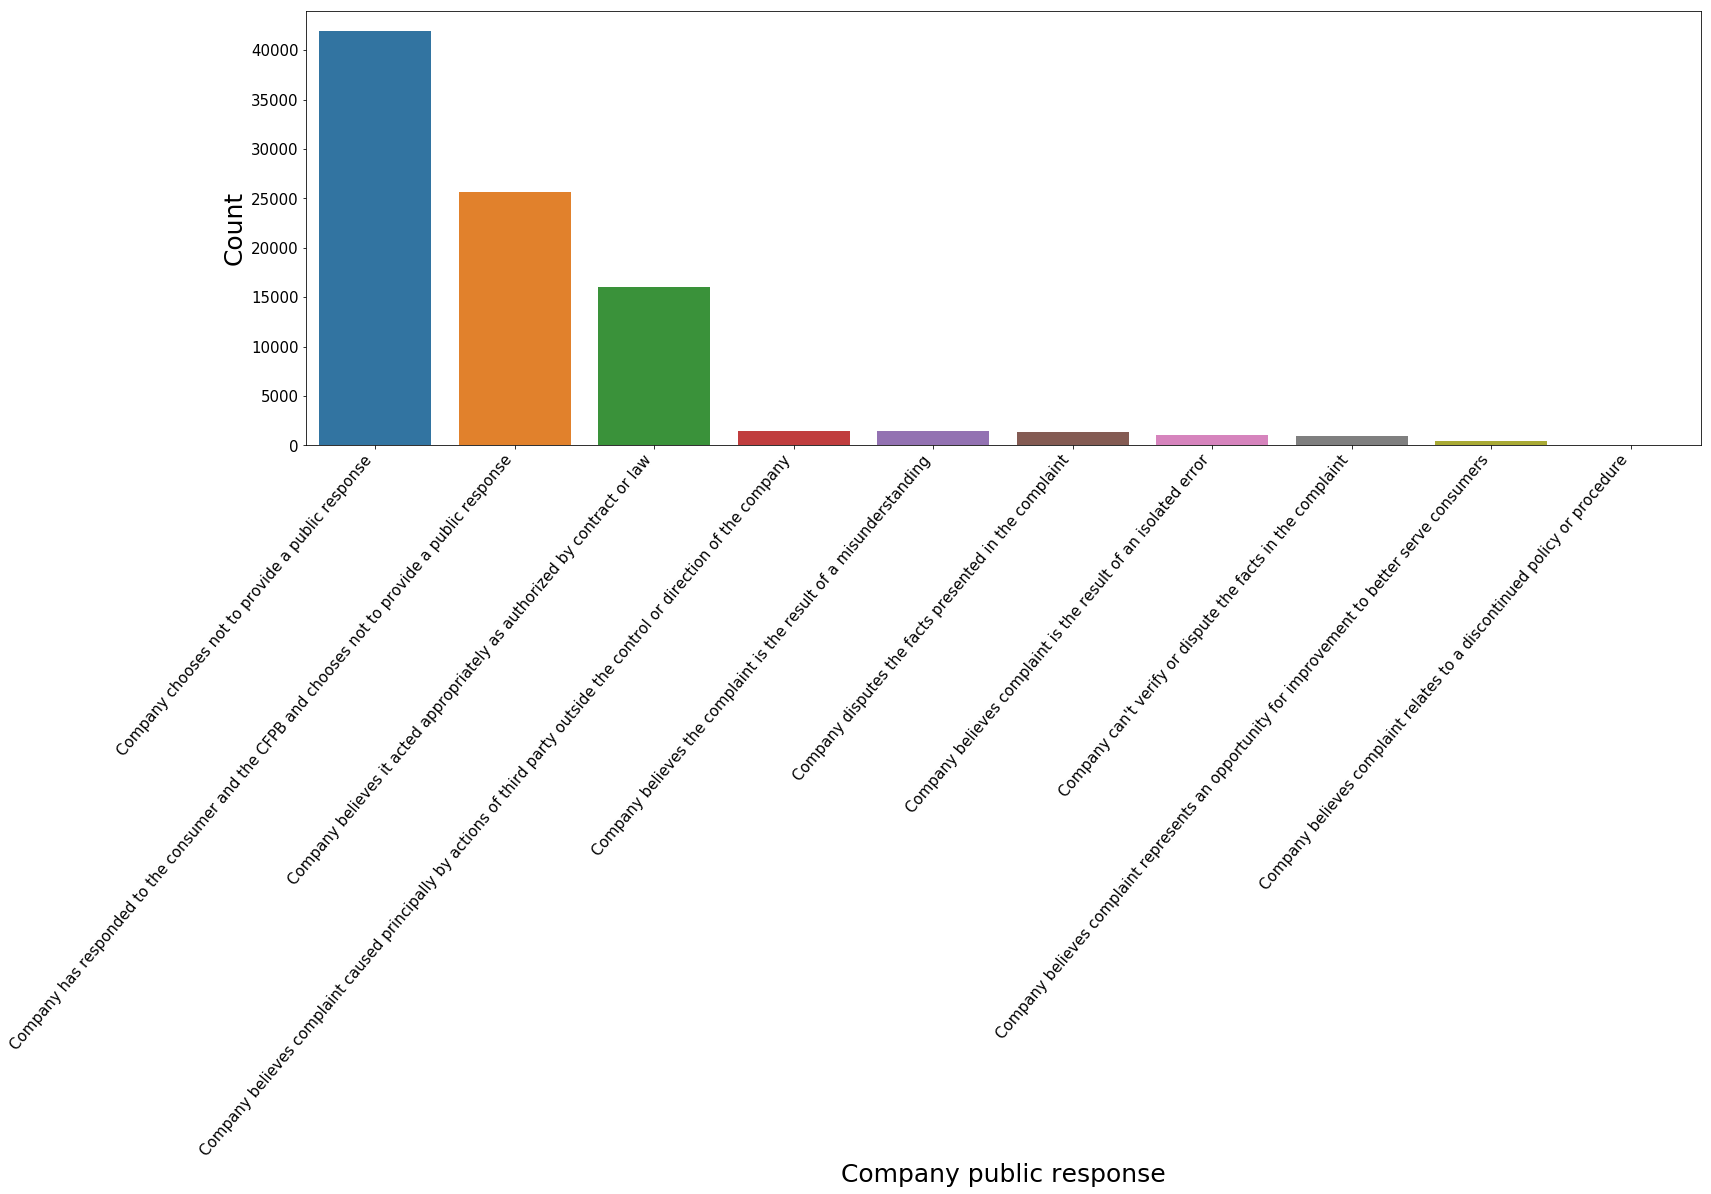

In [73]:
# Distribution of Company pulic response

plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Company public response', data = cd_train,  order = cd_train["Company public response"].value_counts().index)
g.set_xlabel("Company public response", fontsize=25)
g.set_ylabel("Count", fontsize=25)

# 4.7 Company

In [74]:
cd_train['Company'].isnull().sum()

0

In [75]:
cd_train['Company'].nunique()

3276

In [76]:
cd_train['Company'].value_counts()

Bank of America                                         46336
Wells Fargo & Company                                   35453
JPMorgan Chase & Co.                                    28852
Equifax                                                 28832
Experian                                                26794
TransUnion Intermediate Holdings, Inc.                  22508
Citibank                                                22300
Ocwen                                                   17475
Capital One                                             13396
Nationstar Mortgage                                     11278
Synchrony Financial                                      8299
U.S. Bancorp                                             8201
Ditech Financial LLC                                     7624
Navient Solutions, Inc.                                  7375
PNC Bank N.A.                                            5801
Encore Capital Group                                     5248
Amex    

In [77]:
cd_train['Company'].value_counts(normalize=True, dropna=False).head()

Bank of America          0.096852
Wells Fargo & Company    0.074104
JPMorgan Chase & Co.     0.060307
Equifax                  0.060265
Experian                 0.056005
Name: Company, dtype: float64

In [78]:
#cd_train.groupby('Company')['Consumer disputed?'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False).head()

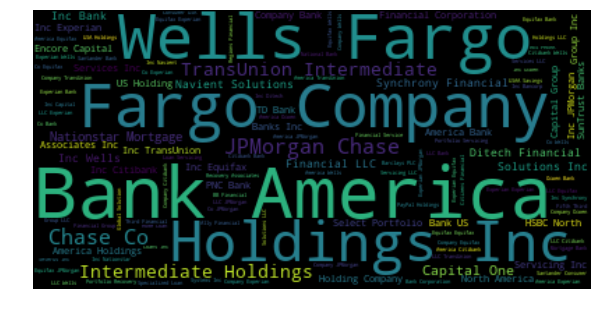

In [79]:
# most frequently used words using word cloud

from wordcloud import WordCloud
all_articles = ' '.join(cd_train['Company'])
wordcloud_spam = WordCloud().generate(all_articles)
plt.figure(figsize = (10,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Count')

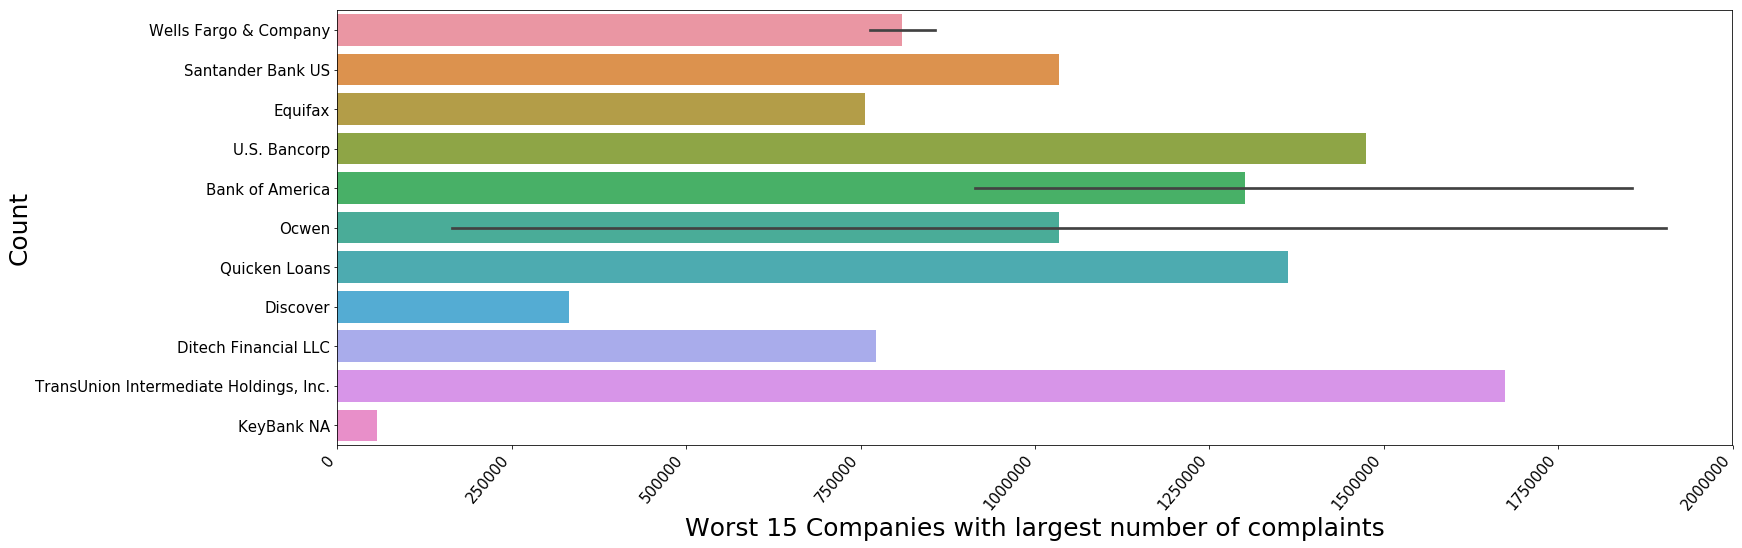

In [80]:
# top 15 companies with largest number of complaints.

plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.barplot(cd_train['Company'].index[0:15], cd_train['Company'].values[0:15])
g.set_xlabel("Worst 15 Companies with largest number of complaints", fontsize=25)
g.set_ylabel("Count", fontsize=25)

# 4.8 State

In [81]:
cd_train['State'].isnull().sum()

3839

In [82]:
cd_train['State'].nunique()

62

In [83]:
cd_train['State'].value_counts().head()

CA    70001
FL    46089
TX    35895
NY    32750
GA    21258
Name: State, dtype: int64

In [84]:
cd_train['State'].value_counts(normalize=True, dropna=False).head()

CA    0.146317
FL    0.096336
TX    0.075028
NY    0.068454
GA    0.044434
Name: State, dtype: float64

In [85]:
#cd_train.groupby('State')['Consumer disputed?'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False).head()

In [86]:
#cd_train.groupby('State')['Consumer disputed?'].value_counts(normalize=True).loc[:,0].sort_values(ascending=False).head()

Text(0, 0.5, 'Count')

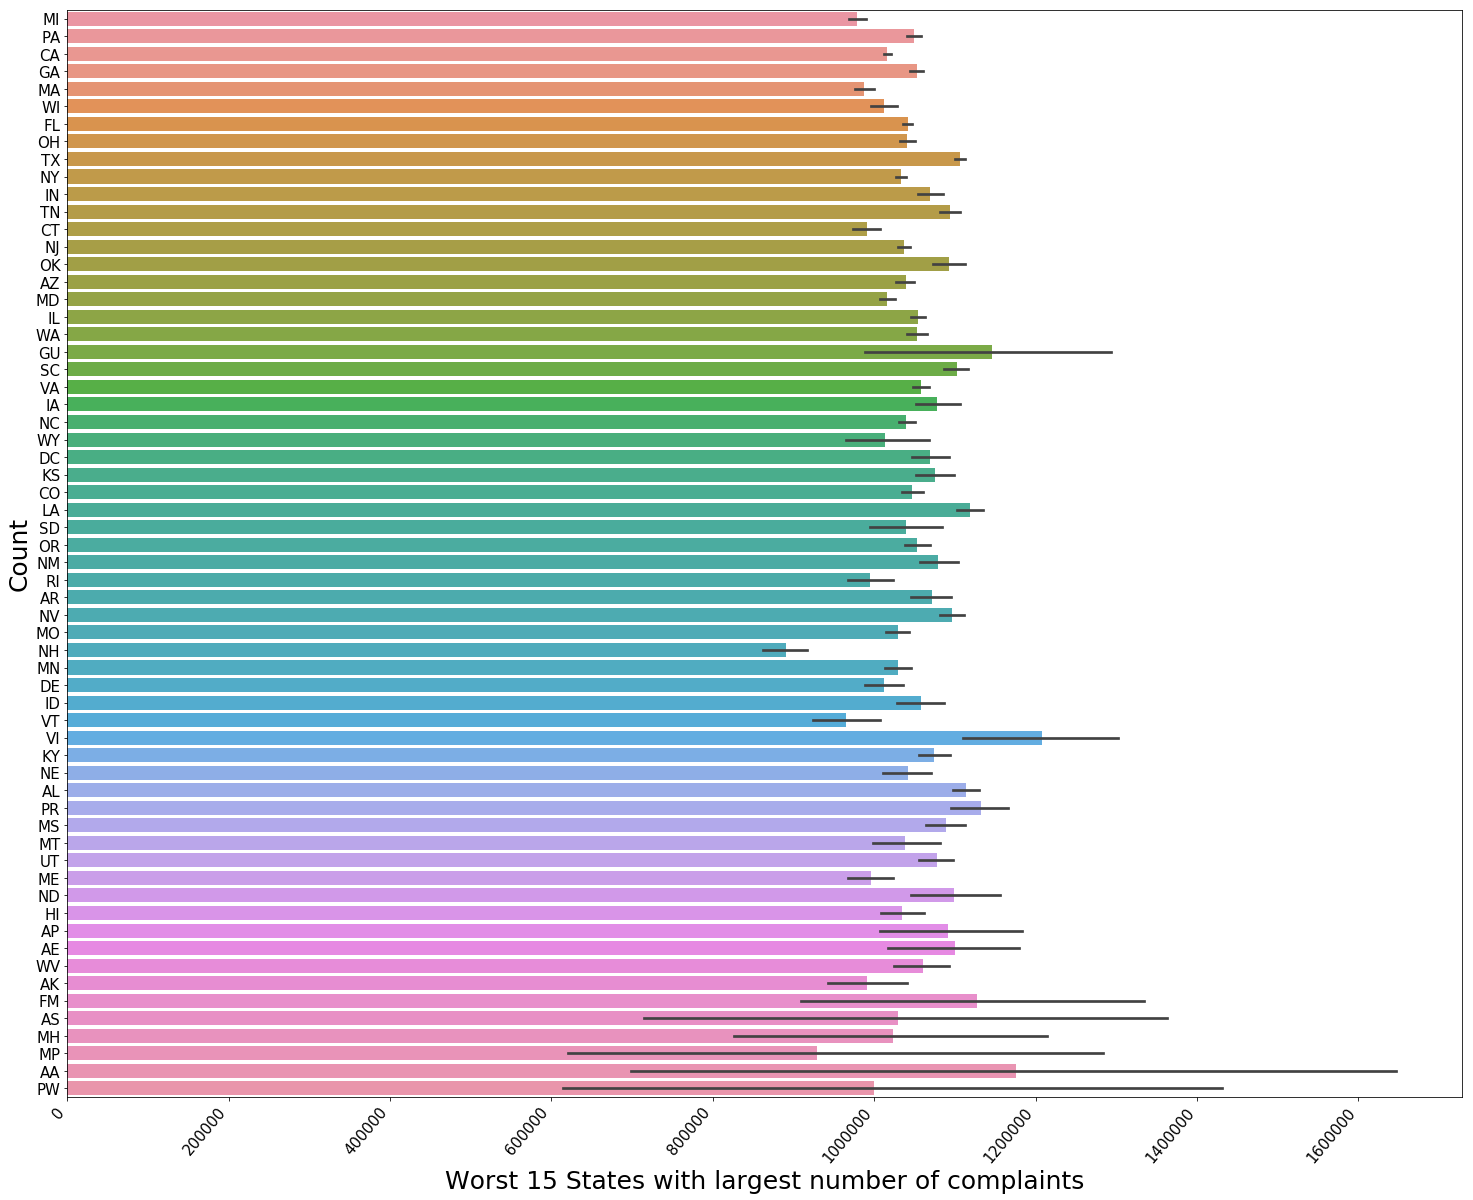

In [87]:
# top 15 states with largest number of complaints.

plt.figure(figsize = (25,20))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.barplot(cd_train['State'].index[0:], cd_train['State'].values[0:])
g.set_xlabel("Worst 15 States with largest number of complaints", fontsize=25)
g.set_ylabel("Count", fontsize=25)

In [88]:
# sns.countplot(x='State', data=cd_train)

# 4.9 ZIP code

In [89]:
cd_train['ZIP code'].isnull().sum()

3848

In [90]:
cd_train['ZIP code'].nunique()

25962

In [91]:
cd_train['ZIP code'].value_counts().head()

300XX    1229
750XX     967
770XX     901
900XX     850
606XX     825
Name: ZIP code, dtype: int64

In [92]:
cd_train['ZIP code'].value_counts(normalize=True, dropna=False).head()

NaN      0.008043
300XX    0.002569
750XX    0.002021
770XX    0.001883
900XX    0.001777
Name: ZIP code, dtype: float64

In [93]:
#cd_train.groupby('ZIP code')['Consumer disputed?'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False).head()

# 4.10 Tags

In [94]:
cd_train['Tags'].isnull().sum()

411215

In [95]:
cd_train['Tags'].nunique()

3

In [96]:
cd_train['Tags'].value_counts()

Older American                   39064
Servicemember                    22592
Older American, Servicemember     5550
Name: Tags, dtype: int64

In [97]:
cd_train['Tags'].value_counts(normalize=True, dropna=False).head()

NaN                              0.859525
Older American                   0.081652
Servicemember                    0.047222
Older American, Servicemember    0.011601
Name: Tags, dtype: float64

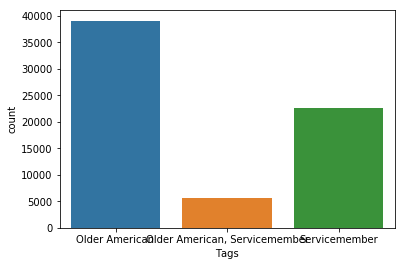

In [98]:
sns.countplot(x="Tags", data=cd_train)

# 4.11 Consumer consent provided?

In [99]:
cd_train['Consumer consent provided?'].isnull().sum()

342934

In [100]:
cd_train['Consumer consent provided?'].nunique()

4

In [101]:
cd_train['Consumer consent provided?'].value_counts()

Consent provided        75095
Consent not provided    56147
Other                    4242
Consent withdrawn           3
Name: Consumer consent provided?, dtype: int64

In [102]:
cd_train['Consumer consent provided?'].value_counts(normalize=True, dropna=False)

NaN                     0.716804
Consent provided        0.156964
Consent not provided    0.117359
Other                   0.008867
Consent withdrawn       0.000006
Name: Consumer consent provided?, dtype: float64

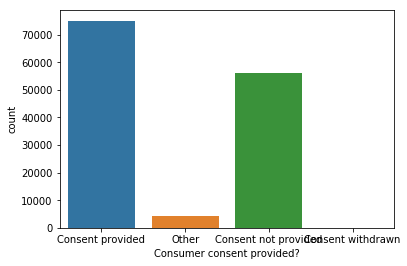

In [103]:
sns.countplot(x="Consumer consent provided?", data=cd_train)

# 4.12 Submitted via

In [104]:
cd_train['Submitted via'].isnull().sum()

0

In [105]:
cd_train['Submitted via'].nunique()

6

In [106]:
cd_train['Submitted via'].value_counts()

Web            313916
Referral        91352
Phone           34417
Postal mail     31448
Fax              7032
Email             256
Name: Submitted via, dtype: int64

In [107]:
cd_train['Submitted via'].value_counts(normalize=True, dropna=False)

Web            0.656150
Referral       0.190945
Phone          0.071939
Postal mail    0.065733
Fax            0.014698
Email          0.000535
Name: Submitted via, dtype: float64

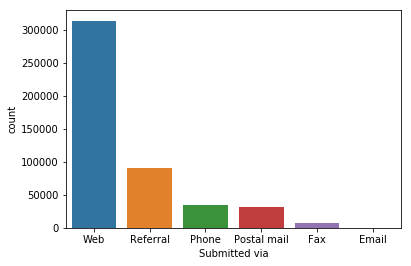

In [108]:
sns.countplot(x="Submitted via", data=cd_train)

# 4.13 Date sent to company

In [109]:
cd_train['Date sent to company'].isnull().sum()

0

In [110]:
cd_train['Date sent to company'].nunique()

1706

In [111]:
cd_train['Date sent to company'].value_counts().head()

2015-11-13    883
2015-07-08    743
2014-01-13    696
2014-02-07    695
2014-03-12    690
Name: Date sent to company, dtype: int64

In [112]:
cd_train['Date sent to company'].value_counts(normalize=True, dropna=False).head()

2015-11-13    0.001846
2015-07-08    0.001553
2014-01-13    0.001455
2014-02-07    0.001453
2014-03-12    0.001442
Name: Date sent to company, dtype: float64

# 4.14 Company response to consumer

In [113]:
cd_train['Company response to consumer'].isnull().sum()

0

In [114]:
cd_train['Company response to consumer'].nunique()

7

In [115]:
cd_train['Company response to consumer'].value_counts()

Closed with explanation            354310
Closed with non-monetary relief     61491
Closed with monetary relief         32925
Closed without relief               14145
Closed                              11365
Closed with relief                   4184
Untimely response                       1
Name: Company response to consumer, dtype: int64

In [116]:
cd_train['Company response to consumer'].value_counts(normalize=True, dropna=False)

Closed with explanation            0.740582
Closed with non-monetary relief    0.128529
Closed with monetary relief        0.068820
Closed without relief              0.029566
Closed                             0.023755
Closed with relief                 0.008745
Untimely response                  0.000002
Name: Company response to consumer, dtype: float64

In [117]:
#cd_train.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).loc[:,0].sort_values(ascending=False).head()

In [118]:
#cd_train.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False).head()

Text(0, 0.5, 'Count')

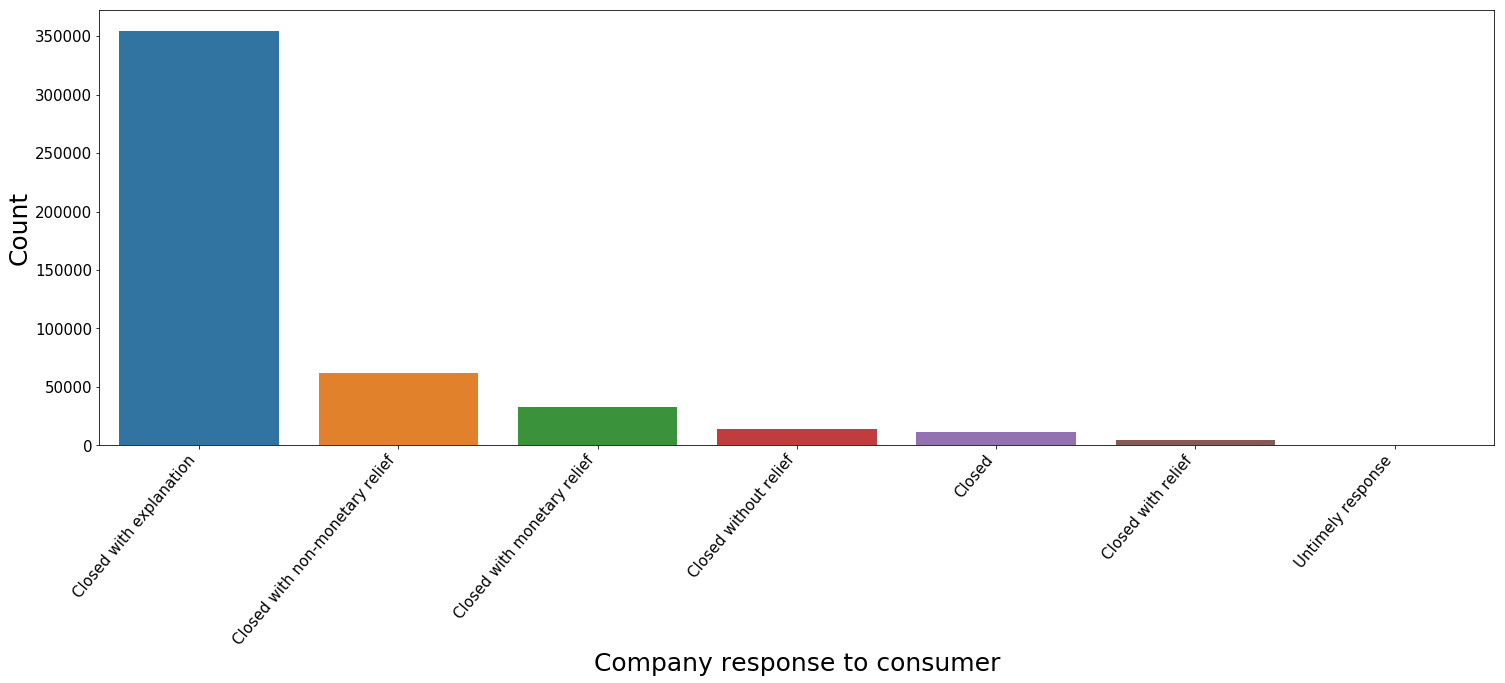

In [119]:
# Distribution of Company pulic response

plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Company response to consumer', data = cd_train,  order = cd_train["Company response to consumer"].value_counts().index)
g.set_xlabel("Company response to consumer", fontsize=25)
g.set_ylabel("Count", fontsize=25)

Most of complaints are closed with explanation without any monetory or non-monetary relief. So, if you have a monetary dispute good luck getting that money back.

# 4.15 Timely response?

In [120]:
cd_train['Timely response?'].isnull().sum()

0

In [121]:
cd_train['Timely response?'].nunique()

2

In [122]:
cd_train['Timely response?'].value_counts()

Yes    470277
No       8144
Name: Timely response?, dtype: int64

In [123]:
cd_train['Timely response?'].value_counts(normalize=True, dropna=False).head()

Yes    0.982977
No     0.017023
Name: Timely response?, dtype: float64

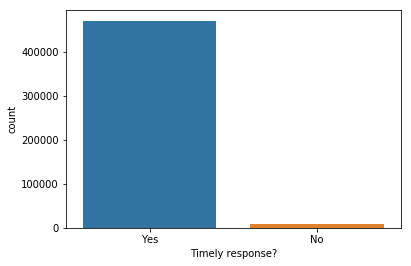

In [124]:
sns.countplot(x="Timely response?", data=cd_train)

# Dropping features which are not relevant

In [125]:
cd_train.shape

(478421, 19)

In [126]:
# dropping Company, Zip code features

cd_train = cd_train.drop(['ZIP code'],1)
cd_test = cd_test.drop(['ZIP code'],1)

In [127]:
cd_train.shape , cd_test.shape

((478421, 18), (119606, 17))

# Creating new features:

dropping feature Complaints received and sent to the company and creating the new feature i.e,. difference between them

In [128]:
for col in ['Date received','Date sent to company']:
    cd_train[col]=pd.to_datetime(cd_train[col],infer_datetime_format=True)
    cd_test[col]=pd.to_datetime(cd_test[col],infer_datetime_format=True)

In [129]:
cd_train['day_diff']=pd.to_numeric(cd_train['Date sent to company']-cd_train['Date received'])
cd_test['day_diff']=pd.to_numeric(cd_test['Date sent to company']-cd_test['Date received'])

In [130]:
for col in ['Date received','Date sent to company']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [131]:
cd_train.shape , cd_test.shape

((478421, 17), (119606, 16))

Creating two new features for ['Consumer complaint narrative', 'Tags', 'Company public response', 'Consumer consent provided?', 'Sub-issue'] one with containing data and second with nan values.

In [132]:
cd_train.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'received year', 'received month', 'day_diff'],
      dtype='object')

In [133]:
# creating two new features for every single feature containing one with nan values and the other with non-nan values

for col in ['Tags', 'Company public response', 'Consumer consent provided?', 'Sub-issue']:
    varname=col.replace('-','_').replace('?','').replace(" ",'_')+'_isNan'
    cd_train[varname]=np.where(pd.isnull(cd_train[col]),1,0)
    cd_train.drop([col],1,inplace=True)
    cd_test[varname]=np.where(pd.isnull(cd_test[col]),1,0)
    cd_test.drop([col],1,inplace=True)  

In [134]:
cd_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478421 entries, 856103 to 1093195
Data columns (total 17 columns):
Product                            478421 non-null object
Sub-product                        339948 non-null object
Issue                              478421 non-null object
Consumer complaint narrative       478421 non-null object
Company                            478421 non-null object
State                              474582 non-null object
Submitted via                      478421 non-null object
Company response to consumer       478421 non-null object
Timely response?                   478421 non-null object
Consumer disputed?                 478421 non-null int32
received year                      478421 non-null int64
received month                     478421 non-null int64
day_diff                           478421 non-null int64
Tags_isNan                         478421 non-null int32
Company_public_response_isNan      478421 non-null int32
Consumer_consent_pr

In [135]:
cd_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119606 entries, 675956 to 1235226
Data columns (total 16 columns):
Product                            119606 non-null object
Sub-product                        84854 non-null object
Issue                              119606 non-null object
Consumer complaint narrative       119606 non-null object
Company                            119606 non-null object
State                              118681 non-null object
Submitted via                      119605 non-null object
Company response to consumer       119606 non-null object
Timely response?                   119606 non-null object
received year                      119606 non-null int64
received month                     119606 non-null int64
day_diff                           119606 non-null int64
Tags_isNan                         119606 non-null int32
Company_public_response_isNan      119606 non-null int32
Consumer_consent_provided_isNan    119606 non-null int32
Sub_issue_isNan     

creating dummy variables for features 'Product', 'Submitted via', 'Company response to consumer':

In [136]:
cd_train.columns

Index(['Product', 'Sub-product', 'Issue', 'Consumer complaint narrative',
       'Company', 'State', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'received year',
       'received month', 'day_diff', 'Tags_isNan',
       'Company_public_response_isNan', 'Consumer_consent_provided_isNan',
       'Sub_issue_isNan'],
      dtype='object')

In [137]:
for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp=pd.get_dummies(cd_train[col],prefix=col,drop_first=True)
    cd_train=pd.concat([temp,cd_train],1)
    cd_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cd_test[col],prefix=col,drop_first=True)
    cd_test=pd.concat([temp,cd_test],1)
    cd_test.drop([col],1,inplace=True)


In [138]:
cd_train.shape , cd_test.shape

((478421, 33), (119606, 32))

Applying label encoding for features  'Sub-product', 'Issue', 'State' :

In [139]:
cat_var = cd_train.select_dtypes(['object']).columns
cat_var

Index(['Sub-product', 'Issue', 'Consumer complaint narrative', 'Company',
       'State'],
      dtype='object')

In [140]:
cd_train['Sub-product'].fillna("not mentioned", inplace = True)  
cd_test['Sub-product'].fillna("not mentioned", inplace = True)  

In [141]:
cd_train['State'].fillna("CA", inplace = True)  
cd_test['State'].fillna("CA", inplace = True)  

In [142]:
# Import label encoder 
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column  'Sub-product', 'Issue', 'State' .

cd_train['Sub-product'] = label_encoder.fit_transform(cd_train['Sub-product'])
cd_train['State'] = label_encoder.fit_transform(cd_train['State']) 
cd_train['Company'] = label_encoder.fit_transform(cd_train['Company']) 
  
cd_train['Sub-product'].unique() , cd_train['State'].unique() ,  cd_train['Company'].unique() 

(array([47,  0, 31, 12,  4,  6, 24,  5, 28, 19, 45, 27, 20, 46,  7, 23, 29,
        30,  1, 34, 18, 22, 38, 39, 32, 14, 10, 44, 36,  2, 40, 25, 35, 16,
        21, 41, 13, 15,  3,  9, 17, 26, 43, 42, 37,  8, 33, 11],
       dtype=int64),
 array([29, 46,  8, 15, 25, 59, 13, 43, 53, 42, 21, 52, 10, 39, 44,  7, 26,
        20, 58, 16, 50, 55, 18, 35, 61, 11, 22,  9, 24, 51, 45, 40, 49,  5,
        41, 31, 38, 30, 12, 19, 57, 56, 23, 37,  3, 47, 33, 34, 54, 27, 36,
        17,  4,  1, 60,  2, 14,  6, 28, 32,  0, 48], dtype=int64),
 array([3192, 2662, 1076, ...,  542,   44,  130], dtype=int64))

In [143]:
cd_train['Sub-product'].nunique() , cd_train['State'].nunique() ,  cd_train['Company'].nunique() 

(48, 62, 3276)

In [144]:
# Import label encoder 
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder()  

# Encode labels in column  'Sub-product', 'Issue', 'State' 

cd_test['Sub-product'] = label_encoder.fit_transform(cd_test['Sub-product'])
cd_test['State'] = label_encoder.fit_transform(cd_test['State']) 
cd_test['Company'] = label_encoder.fit_transform(cd_test['Company']) 
  
cd_test['Sub-product'].unique() , cd_test['State'].unique()  ,  cd_test['Company'].unique()

(array([ 2,  7,  5, 47, 12, 29, 28,  4,  0, 27, 31, 19,  6, 30, 38, 22, 20,
        24, 44, 46, 23, 39, 10, 36, 34, 18, 40,  3, 45,  1, 13, 35, 16, 25,
         9, 41, 14, 17, 43, 21, 32, 15, 42,  8, 33, 37, 26, 11],
       dtype=int64),
 array([ 8, 13, 11, 53, 58, 20, 15, 55, 12, 42, 24,  7, 25, 10, 46, 43, 29,
        35, 52, 30, 31, 18, 45, 26, 60, 39,  9, 41,  5, 22, 59, 40, 54, 44,
        23, 21, 50, 38, 17, 19, 37,  3, 33, 61, 27,  1, 34, 47, 51, 36, 57,
        56, 49,  2, 48, 16, 28,  6,  4, 32, 14,  0], dtype=int64),
 array([ 271, 1398, 2183, ..., 1277, 2138,  817], dtype=int64))

In [145]:
cd_test['Sub-product'].nunique() , cd_test['State'].nunique()  ,  cd_test['Company'].nunique()

(48, 62, 2237)

In [146]:
cd_train.shape , cd_test.shape

((478421, 33), (119606, 32))

In [147]:
cd_train.dtypes

Timely response?_Yes                                             uint8
Company response to consumer_Closed with explanation             uint8
Company response to consumer_Closed with monetary relief         uint8
Company response to consumer_Closed with non-monetary relief     uint8
Company response to consumer_Closed with relief                  uint8
Company response to consumer_Closed without relief               uint8
Company response to consumer_Untimely response                   uint8
Submitted via_Fax                                                uint8
Submitted via_Phone                                              uint8
Submitted via_Postal mail                                        uint8
Submitted via_Referral                                           uint8
Submitted via_Web                                                uint8
Product_Consumer Loan                                            uint8
Product_Credit card and Prepaid card                             uint8
Produc

In [148]:
cd_test.dtypes

Timely response?_Yes                                             uint8
Company response to consumer_Closed with explanation             uint8
Company response to consumer_Closed with monetary relief         uint8
Company response to consumer_Closed with non-monetary relief     uint8
Company response to consumer_Closed with relief                  uint8
Company response to consumer_Closed without relief               uint8
Company response to consumer_Untimely response                   uint8
Submitted via_Fax                                                uint8
Submitted via_Phone                                              uint8
Submitted via_Postal mail                                        uint8
Submitted via_Referral                                           uint8
Submitted via_Web                                                uint8
Product_Consumer Loan                                            uint8
Product_Credit card and Prepaid card                             uint8
Produc

# tfidf :

In [149]:
# lets combine the data for performing tfidf :

cd_test['Consumer disputed?']=np.nan

cd_train['data']='train'

cd_test['data']='test'

cd_test = cd_test[cd_train.columns]  # maintains similar set of columns from train and test datasets

cd_all = pd.concat([cd_train,cd_test] , axis=0)

In [150]:
cd_all.head()

,Timely response?_Yes,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,...,State,Consumer disputed?,received year,received month,day_diff,Tags_isNan,Company_public_response_isNan,Consumer_consent_provided_isNan,Sub_issue_isNan,data
Complaint ID,,,,,,,,,,,,,,,,,,,,,
856103,1,1,0,0,0,0,0,0,0,0,...,29,0.0,2014,5,86400000000000,0,1,1,1,train
1034666,1,0,0,0,0,0,0,0,0,0,...,46,0.0,2014,9,518400000000000,1,1,1,1,train
756363,1,0,0,1,0,0,0,0,0,0,...,8,0.0,2014,3,1814400000000000,1,1,1,0,train
1474177,1,0,1,0,0,0,0,0,0,0,...,15,0.0,2015,7,0,0,0,0,1,train
1132572,1,1,0,0,0,0,0,0,0,0,...,25,0.0,2014,11,691200000000000,1,1,1,1,train


In [220]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

column_trans = ColumnTransformer([('Issue', TfidfVectorizer(max_features=8, lowercase=True, analyzer='word',
                                                            stop_words= 'english',ngram_range=(2,2)), 'Issue'),
                                  ('Consumer complaint narrative', TfidfVectorizer(max_features=15, lowercase=True,
                                    analyzer='word', stop_words= 'english',ngram_range=(1,1)),'Consumer complaint narrative')],
                                 remainder='passthrough')

column_trans.fit(cd_all)

column_trans.fit_transform(cd_all)


array([[0.0, 0.0, 0.0, ..., 1, 1, 'train'],
       [0.0, 0.0, 0.0, ..., 1, 1, 'train'],
       [0.5704816231880172, 0.0, 0.5807541293890063, ..., 1, 0, 'train'],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 0, 'test'],
       [0.0, 0.0, 0.0, ..., 1, 0, 'test'],
       [0.0, 0.0, 0.0, ..., 1, 0, 'test']], dtype=object)

In [221]:
column_trans.fit_transform(cd_all).shape

(598027, 55)

In [222]:
col_names = column_trans.get_feature_names()
col_names

['Issue__credit report',
 'Issue__escrow account',
 'Issue__incorrect information',
 'Issue__information credit',
 'Issue__loan modificationcollectionforeclosure',
 'Issue__loan servicing',
 'Issue__payments escrow',
 'Issue__servicing payments',
 'Consumer complaint narrative__account',
 'Consumer complaint narrative__bank',
 'Consumer complaint narrative__credit',
 'Consumer complaint narrative__debt',
 'Consumer complaint narrative__information',
 'Consumer complaint narrative__loan',
 'Consumer complaint narrative__mortgage',
 'Consumer complaint narrative__no_narrative',
 'Consumer complaint narrative__nt',
 'Consumer complaint narrative__payment',
 'Consumer complaint narrative__received',
 'Consumer complaint narrative__report',
 'Consumer complaint narrative__time',
 'Consumer complaint narrative__told',
 'Consumer complaint narrative__xxxx',
 'Timely response?_Yes',
 'Company response to consumer_Closed with explanation',
 'Company response to consumer_Closed with monetary rel

# Converting ndarray to dataframe :

In [223]:
cd_dataframe = pd.DataFrame(column_trans.fit_transform(cd_all))
cd_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0,0,0,0,0,0,0,0,0,0,...,29,0,2014,5,86400000000000,0,1,1,1,train
1,0,0,0,0,0,0,0,0,0,0,...,46,0,2014,9,518400000000000,1,1,1,1,train
2,0.570482,0,0.580754,0.580754,0,0,0,0,0,0,...,8,0,2014,3,1814400000000000,1,1,1,0,train
3,0,0,0,0,0,0,0,0,0,0.152202,...,15,0,2015,7,0,0,0,0,1,train
4,0,0,0,0,0,0,0,0,0,0,...,25,0,2014,11,691200000000000,1,1,1,1,train


Above dataframe doesnot contain column names and index.
Now we add column names and index to the present dataframe.

In [224]:
# Change the column names 
cd_dataframe.columns = col_names
  
# Change the row indexes 
cd_dataframe.index = cd_all.index 
  
# printing the data frame 
cd_dataframe.head()

,Issue__credit report,Issue__escrow account,Issue__incorrect information,Issue__information credit,Issue__loan modificationcollectionforeclosure,Issue__loan servicing,Issue__payments escrow,Issue__servicing payments,Consumer complaint narrative__account,Consumer complaint narrative__bank,...,State,Consumer disputed?,received year,received month,day_diff,Tags_isNan,Company_public_response_isNan,Consumer_consent_provided_isNan,Sub_issue_isNan,data
Complaint ID,,,,,,,,,,,,,,,,,,,,,
856103,0,0,0,0,0,0,0,0,0,0,...,29,0,2014,5,86400000000000,0,1,1,1,train
1034666,0,0,0,0,0,0,0,0,0,0,...,46,0,2014,9,518400000000000,1,1,1,1,train
756363,0.570482,0,0.580754,0.580754,0,0,0,0,0,0,...,8,0,2014,3,1814400000000000,1,1,1,0,train
1474177,0,0,0,0,0,0,0,0,0,0.152202,...,15,0,2015,7,0,0,0,0,1,train
1132572,0,0,0,0,0,0,0,0,0,0,...,25,0,2014,11,691200000000000,1,1,1,1,train


In [225]:
cd_dataframe.shape

(598027, 55)

In [226]:
insignificant_features = ['Consumer complaint narrative__nt','Consumer complaint narrative__received',
                          'Consumer complaint narrative__report','Consumer complaint narrative__time',
                          'Consumer complaint narrative__told','Consumer complaint narrative__xxxx']

In [227]:
cd_dataframe.drop(insignificant_features, axis=1, inplace=True)

In [228]:
cd_dataframe.shape

(598027, 49)

In [229]:
cd_dataframe.dtypes

Issue__credit report                                            object
Issue__escrow account                                           object
Issue__incorrect information                                    object
Issue__information credit                                       object
Issue__loan modificationcollectionforeclosure                   object
Issue__loan servicing                                           object
Issue__payments escrow                                          object
Issue__servicing payments                                       object
Consumer complaint narrative__account                           object
Consumer complaint narrative__bank                              object
Consumer complaint narrative__credit                            object
Consumer complaint narrative__debt                              object
Consumer complaint narrative__information                       object
Consumer complaint narrative__loan                              object
Consum

# Splitting the dataframe into train and test dataset :

In [230]:
cd_train = cd_dataframe[cd_dataframe['data']=='train']

del cd_train['data']

cd_test = cd_dataframe[cd_dataframe['data']=='test']

cd_test.drop(['Consumer disputed?','data'],axis=1,inplace=True)

#del cd_all

C:\Users\srinivas chary\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [231]:
cd_train.shape  ,  cd_test.shape

((478421, 48), (119606, 47))

In [234]:
# cd_train['Issue__credit report']= pd.to_numeric(cd_train['Issue__credit report'], errors='coerce')

cd_train = cd_train.astype('int64')
cd_train.head()

,Issue__credit report,Issue__escrow account,Issue__incorrect information,Issue__information credit,Issue__loan modificationcollectionforeclosure,Issue__loan servicing,Issue__payments escrow,Issue__servicing payments,Consumer complaint narrative__account,Consumer complaint narrative__bank,...,Company,State,Consumer disputed?,received year,received month,day_diff,Tags_isNan,Company_public_response_isNan,Consumer_consent_provided_isNan,Sub_issue_isNan
Complaint ID,,,,,,,,,,,,,,,,,,,,,
856103,0,0,0,0,0,0,0,0,0,0,...,3192,29,0,2014,5,86400000000000,0,1,1,1
1034666,0,0,0,0,0,0,0,0,0,0,...,2662,46,0,2014,9,518400000000000,1,1,1,1
756363,0,0,0,0,0,0,0,0,0,0,...,1076,8,0,2014,3,1814400000000000,1,1,1,0
1474177,0,0,0,0,0,0,0,0,0,0,...,3034,15,0,2015,7,0,0,0,0,1
1132572,0,0,0,0,0,0,0,0,0,0,...,399,25,0,2014,11,691200000000000,1,1,1,1


In [235]:
# cd_test['Issue__credit report']= pd.to_numeric(cd_test['Issue__credit report'], errors='coerce')

cd_test = cd_test.astype('int64')
cd_test.head()

,Issue__credit report,Issue__escrow account,Issue__incorrect information,Issue__information credit,Issue__loan modificationcollectionforeclosure,Issue__loan servicing,Issue__payments escrow,Issue__servicing payments,Consumer complaint narrative__account,Consumer complaint narrative__bank,...,Sub-product,Company,State,received year,received month,day_diff,Tags_isNan,Company_public_response_isNan,Consumer_consent_provided_isNan,Sub_issue_isNan
Complaint ID,,,,,,,,,,,,,,,,,,,,,
675956,0,0,0,0,0,0,0,0,0,0,...,2,271,8,2014,1,-86400000000000,1,1,1,1
1858795,0,0,0,0,0,0,0,0,0,0,...,7,1398,13,2016,3,0,1,1,0,0
32637,0,0,0,0,0,0,0,0,0,0,...,5,2183,8,2012,3,86400000000000,1,1,1,1
1731374,0,0,0,0,0,0,0,0,0,0,...,47,2048,13,2016,1,432000000000000,0,0,1,0
501487,0,0,0,0,1,0,0,0,0,0,...,12,271,13,2013,8,0,1,1,1,1


In [236]:
pd.DataFrame(cd_train).to_csv("cd_train_pre_ind.csv", index = True)

In [237]:
pd.DataFrame(cd_test).to_csv("cd_test_pre_ind.csv", index = True)

# Modelling :

In order to get a passing grade in this project you need to have the AUC score of at least 0.54 for your test data
predictions.

In [ ]:
from sklearn.model_selection import train_test_split

ld_train1,ld_train2=train_test_split(ld_train,test_size=0.2,random_state=2)

# training dataset

x_train1 = cd_train1.drop('Consumer disputed?' , axis=1)

y_train1 = cd_train1['Consumer disputed?']

# validation dataset

x_train2 = cd_train2.drop('Consumer disputed?' , axis=1)

y_train2 = cd_train2['Consumer disputed?']


In [251]:
# model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_train2)

roc_auc_score(y_train2, y_prediction)

RandomForestClassifier(n_estimators=10)

In [238]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
cd_train = scaler.fit_transform(cd_train)

cd_train

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

# Randomforest Classifier :

In [ ]:
# training dataset

x_train = cd_train.drop('Consumer disputed?' , axis=1)

y_train = cd_train['Consumer disputed?']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_params={
            
    
    
    
            }

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
random_search = RandomizedSearchCV(random_forest , param_distributions = rf_params , n_iter=20 , cv=5 , scoring='roc_auc',
                                 n_jobs=-1 , verbose=2)

In [ ]:
random_search.fit(x_train , y_train)

# Sequential Parameter tuning for xgboost

If we tune all the paramters together , there are chances that our results will be much far from the best. There are many parameters where variation doesnt impact the performance too much and we can tune them later once we have fixed values of parameters with volatile performance.

As a general strtaegy you can start with tuning numer of trees or n_estimators , in case of boosting machines , learning_rate is directly related with n_estimators . A very low learning_rate will need high number of n_estimators . We can start with a decent fixed learning rate and tune n_estimaors for it. 

All can be left as default for now except subsample , colsample_bytree and colsample_bylevel, these are set to default=1, we'll take a more conservative value 0.8

In [270]:
# this function displays the best performance parameter , used for hyper-parameter tunning :

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [276]:
# training dataset

x_train = cd_train.drop('Consumer disputed?' , axis=1)

y_train = cd_train['Consumer disputed?']


## hyperparameter tuning :

In [279]:
xgb_params = {  
                "n_estimators":[300]
             }

In [280]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(learning_rate=0.1 , subsample=0.8 , colsample_bylevel=0.8 , colsample_bytree=0.4)

In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

grid_search = GridSearchCV(xgb1 , cv=5 , param_grid=xgb_params , scoring='roc_auc' , verbose=2 , n_jobs=-1)

In [282]:
grid_search.fit(x_train , y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.0min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bylevel=0.8,
                                     colsample_bytree=0.4, subsample=0.8),
             n_jobs=-1, param_grid={'n_estimators': [300]}, scoring='roc_auc',
             verbose=2)

In [283]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.636 (std: 0.00160)
Parameters: {'n_estimators': 300}



we got n_estimator=300 as best with learning_rate=0.1  . Next we'll tune max_depth,gamma and min_child_weight, which control overfit by controlling size of individual trees

In [284]:
xgb_params={
            "gamma":[0,1,5],
            "max_depth": [3,5,8],
            "min_child_weight":[0.5,2,5]
            }

In [285]:
xgb2=XGBClassifier(learning_rate=0.1 , n_estimators=500 , subsample=0.8 , colsample_bylevel=0.8 , colsample_bytree=0.8)

In [288]:
random_search = RandomizedSearchCV(xgb2 , param_distributions=xgb_params , n_iter=20 , cv=5 , scoring='roc_auc',
                                 n_jobs=-1 , verbose=2)

In [ ]:
random_search.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [1]:
report(random_search.cv_results_,3)

NameError: name 'report' is not defined

we got best values for parameters being tuned as follows : {'min_child_weight': 1, 'gamma': 0, 'max_depth': 3}
    
Since there is imbalance in the data , we'll look into max_delta_step and scale_pos_weight next

In [ ]:
y_train.value_counts()

In [ ]:
xgb_params={
            'max_delta_step':[0,1,5,10],
            'scale_pos_weight':[1,2,3,4]
            }

In [ ]:
xgb3=XGBClassifier(learning_rate=0.1 , n_estimators=500 , min_child_weight=1 , gamma=0 , max_depth=3,
                  subsample=0.8 , colsample_bylevel=0.8 , colsample_bytree=0.8)

In [ ]:
grid_search = GridSearchCV(xgb3 , param_grid=xgb_params , cv=5 , scoring='roc_auc' , n_jobs=-1 , verbose=10)

In [ ]:
grid_search.fit(x_train , y_train)

In [ ]:
report(grid_search.cv_results_,3)

it turns out that , since imbalance was not that severe , defaults come out as best choices {'scale_pos_weight': 1, 'max_delta_step': 0}

Next we check the effect of the noise on data and tune , subsample , colsample_bytree and colsample_bylevel

In [ ]:
xgb_params={
            'subsample':[i/10 for i in range(8,12)],
            'colsample_bytree':[i/10 for i in range(8,12)],
            'colsample_bylevel':[i/10 for i in range(8,12)]
            }

In [ ]:
xgb4 = XGBClassifier(learning_rate=0.1 , n_estimators=500 , min_child_weight=1 , gamma=0 , max_depth=3,
                        scale_pos_weight=1 , max_delta_step=0
                  )

In [ ]:
random_search = RandomizedSearchCV(xgb4 , param_distributions = xgb_params , cv=5 , n_iter=20 , scoring='roc_auc',
                                n_jobs=-1 , verbose=20)

In [ ]:
random_search.fit(x_train , y_train)

In [ ]:
report(random_search.cv_results_,3)

bets values that we got for paramaeters are as follows : {'colsample_bylevel': 0.5, 'colsample_bytree': 0.6, 'subsample': 1.0}
    
    lastly we can work on L2 and L1 penalty on leaf node score to further reduce overfit if there is any

In [ ]:
xgb5 = XGBClassifier(learning_rate=0.1 , n_estimators=500 , min_child_weight=1 , gamma=0 , max_depth=3,
                        scale_pos_weight=1 , max_delta_step=0,
                   colsample_bylevel= 0.5 , colsample_bytree= 0.6, subsample= 1.0)

In [ ]:
xgb_params = {
            'reg_lambda':[i/10 for i in range(0,10)],
            'reg_alpha':[i/10 for i in range(0,10)]
            }

In [ ]:
random_search=RandomizedSearchCV(xgb5 , param_distributions=xgb_params , cv=5 , n_iter=20 , scoring='roc_auc',
                                n_jobs=-1 , verbose=10)

In [ ]:
random_search.fit(x_train , y_train)

In [ ]:
report(random_search.cv_results_,3)

The best value that we got here is {'reg_lambda': 1.5, 'reg_alpha': 0.0}, but the performance has gone down. May be the default was doing better and wasnt picked as one of the candidates here in the random_search. we'll go with those defaults values instead

In [ ]:
xgb6=XGBClassifier(learning_rate=0.1 , n_estimators=500 , min_child_weight=1 , gamma=0 , max_depth=3,
                        scale_pos_weight=1 , max_delta_step=0,
                   colsample_bylevel= 0.5 , colsample_bytree= 0.6 , subsample= 1.0,
                  reg_lambda=1 ,reg_alpha=0)

If we want to simply get cv performance of a model , without having to select any parameters we can make use of cross_validation_score function

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(xgb6 , x_train , y_train , scoring='roc_auc' , verbose=10 , n_jobs=-1 , cv=10)

In [ ]:
# scores are obtained from above cell execution

scores=[]

In [ ]:
np.mean(scores)